In [7]:
# @title Pre-processing tools
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [9]:
# @title Importing the Dataset

dataset = pd.read_csv("weather.csv", na_values='-')
selected_columns_indices = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,18,19]
date_column_index = 0

precipitation_column_index = 19
target_column_index = 17
# dataset.iloc[:, precipitation_column_index] = pd.to_numeric(dataset.iloc[:, precipitation_column_index].replace(['T', '-'], 0.005, errors='coerce'), errors='coerce')

# dataset.iloc[:, date_column_index] = pd.to_datetime(dataset.iloc[:, date_column_index])
# dataset['Day'] = dataset.iloc[:, date_column_index].dt.day
# dataset['Month'] = dataset.iloc[:, date_column_index].dt.month
# dataset['Year'] = dataset.iloc[:, date_column_index].dt.year

# dataset.drop(columns=[dataset.columns[date_column_index]], inplace=True)

# dataset['Day'] = dataset['Day'].astype(float)
# dataset['Month'] = dataset['Month'].astype(float)
# dataset['Year'] = dataset['Year'].astype(float)

# dataset.insert(0, 'Year', dataset.pop('Year'))
# dataset.insert(1, 'Month', dataset.pop('Month'))
# dataset.insert(2, 'Day', dataset.pop('Day'))

dataset.iloc[:, precipitation_column_index] = dataset.iloc[:, precipitation_column_index].replace('T', 0).astype(float)
dataset.iloc[:, selected_columns_indices] = dataset.iloc[:, selected_columns_indices].replace('-', np.nan).astype(float)

x = dataset.iloc[:, selected_columns_indices].values
y = dataset.iloc[:, target_column_index].values



<ipython-input-9-bffdf5770b24>:26: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataset.iloc[:, precipitation_column_index] = dataset.iloc[:, precipitation_column_index].replace('T', 0).astype(float)
<ipython-input-9-bffdf5770b24>:27: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataset.iloc[:, selected_columns_indices] = dataset.iloc[:, selected_columns_indices].replace('-', np.nan).astype(float)


In [ ]:
print(dataset)

In [ ]:
print(x)

In [ ]:
print(y)

In [10]:
# @title Taking Care of Missing Data
from sklearn.impute import SimpleImputer

imputer_x = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer_y = SimpleImputer(missing_values=np.nan, strategy='mean')
min_index, max_index = 0, 17
imputer_x.fit(x[:, min_index:max_index])
x[:, min_index:max_index] = imputer_x.transform(x[:, min_index:max_index])
y = y.reshape(-1,1)
imputer_y.fit(y)
y = imputer_y.transform(y).flatten()

In [ ]:
print(x)

In [11]:
# @title Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)


In [ ]:
print(x_train)

In [ ]:
print(x_test)

In [ ]:
print(y_train)

In [ ]:
print(y_test)

In [12]:
# @title Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train[:, min_index:max_index] = sc.fit_transform(x_train[:, min_index:max_index])
x_test[:, min_index:max_index] = sc.transform(x_test[:, min_index:max_index])


In [ ]:
# print(x_train)

In [ ]:
# print(x_test)

In [13]:
# @title Training the model
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100, random_state=2)
regressor.fit(x_train, y_train)

RandomForestRegressor(random_state=2)

In [14]:
# @title Predicting a new result
y_pred = regressor.predict(x_test)

In [ ]:
print(y_pred)

[ 8.          8.          6.          5.00835232  5.          5.
  8.          7.          4.          3.          5.          4.
  5.          4.          3.          7.          6.          7.
  2.          8.          3.          3.          7.          9.
  3.          3.          3.          5.          3.          5.
  2.          2.          5.          7.          4.          3.
  9.          3.          2.          7.          4.          8.
  2.          5.          5.          4.          2.          3.
  5.          4.          2.          6.          6.          5.
  3.          8.          3.          2.          7.          6.
  3.          5.          8.          5.          6.          2.
  5.          8.          3.          4.          3.          3.
  5.          2.          8.          5.          2.          4.
  4.          3.          6.          6.          2.          6.
  1.          7.          4.          5.          3.          2.
  7.          4.         

In [ ]:
# @title Evaluating the performance of the model
# using the mean absolute error
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 0.905403781551276


In [ ]:
#using the mean squared error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 1.3216441052027514


In [ ]:
#using the root mean squared error

rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

Root Mean Squared Error: 1.1496278115993677


In [16]:
#using the R2 score
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(f'R2 Score: {r2}')

R2 Score: 0.6811257384580574


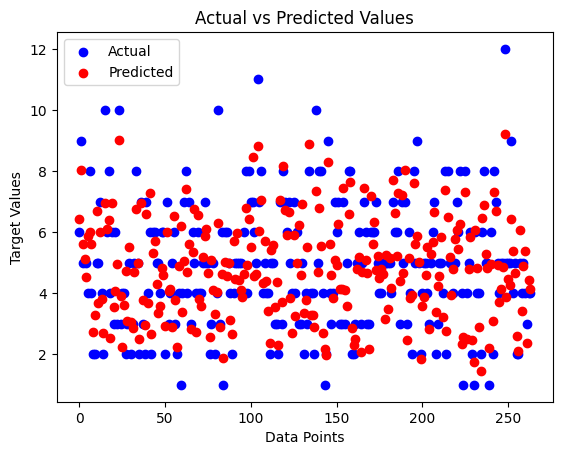

In [17]:
# @title Visualizing the results
plt.scatter(np.arange(len(y_test)), y_test, color='blue', label='Actual')
plt.scatter(np.arange(len(y_test)), y_pred, color='red', label='Predicted')

plt.title('Actual vs Predicted Values')
plt.xlabel('Data Points')
plt.ylabel('Target Values')
plt.legend()
plt.show()